# HANDWRITTEN CHARACTER RECOGNITION WITH CNN

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import cv2
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.utils import shuffle

In [2]:
# Reading CSV file
train=pd.read_csv("emnist_byclass_train.csv").astype('float32')
train=np.array(train)
test=pd.read_csv("emnist_byclass_test.csv").astype('float32')
test=np.array(test)

# There are in total 814255 images each of size 28 X 28
# Each row in the CSV file contains one image flatten in a vector of size 784
print("train_data: \n")
print(train)

print("\n")

print("test_data: \n")
print(test)

train_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 6.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [ 5.  0.  0. ...  0.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 [22.  0.  0. ...  0.  0.  0.]]


test_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [28.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 5.  0.  0. ...  0.  0.  0.]]


In [3]:
#labels
word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
             16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',
             31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',
             46:'k',47:'l',48:'m',49:'n', 50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',
             61:'z'}

In [4]:
train=shuffle(train)
test=shuffle(test)

In [5]:
# Split data into images and their labels
train_x = train[:, 1:785]
train_y = train[:, 0]
test_x = test[:, 1:785]
test_y = test[:, 0]

# Reshape the input data to match the expected input shape of the model
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# Convert labels to categorical
from keras.utils import to_categorical
train_y = to_categorical(train_y, num_classes=62)
test_y = to_categorical(test_y, num_classes=62)

print("train_x: ", train_x.shape)
print()

print("test_x",test_x.shape)
print()

print("train_y",train_y.shape)
print()

print("test_y",test_y.shape)
print()

train_x:  (697931, 28, 28, 1)

test_x (116322, 28, 28, 1)

train_y (697931, 62)

test_y (116322, 62)



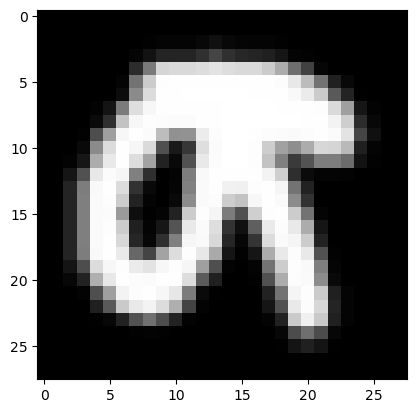

In [7]:
plt.imshow(test_x[14], cmap="gray")

In [6]:
# Data in emnist by class is rotated and reversed
for i in range(train_x.shape[0]):
    image = train_x[i]
    image = np.array(image)
    image = np.reshape(image, (28, 28))
    image = np.transpose(image)
    image = image.reshape((28, 28, 1))
    train_x[i] = image

for i in range(test_x.shape[0]):
    image = test_x[i]
    image = np.array(image)
    image = np.reshape(image, (28, 28))
    image = np.transpose(image)
    image = image.reshape((28, 28, 1))
    test_x[i] = image

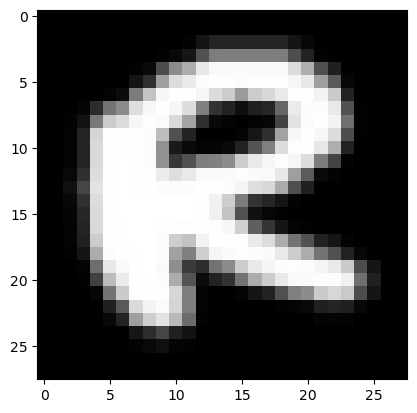

In [9]:
plt.imshow(test_x[14], cmap="gray")

In [10]:
counts = [0 for i in range(62)]

for i in range(train_x.shape[0]):
  counts[np.argmax(train_y[i])] += 1

for i in range(test_x.shape[0]):
  counts[np.argmax(test_y[i])] += 1

<Figure size 800x600 with 0 Axes>

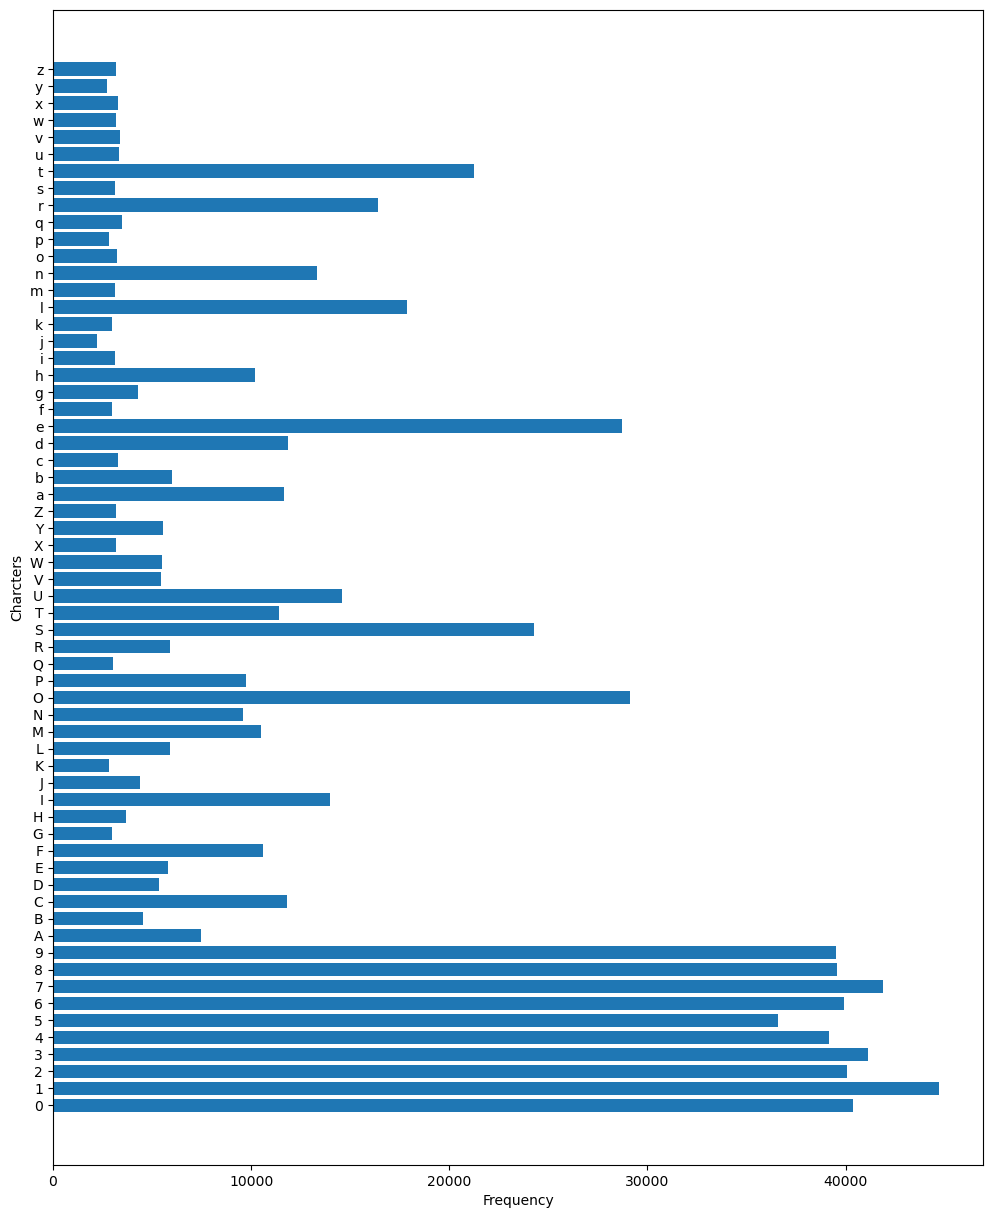

In [11]:
fig = plt.figure(figsize=(8, 6))
x = list(word_dict.values())

fig, ax = plt.subplots(1,1, figsize=(12,15))
ax.barh(x, counts)   
plt.xlabel("Frequency")
plt.ylabel("Charcters")
plt.show()

In [12]:
print(train_x.shape)
print(test_x.shape)

(697931, 28, 28, 1)
(116322, 28, 28, 1)


In [7]:
# CNN model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(62, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                        

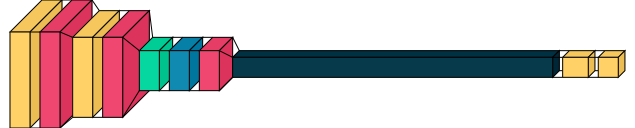

In [14]:
import visualkeras as vk
vk.layered_view(model)

In [15]:
history = model.fit(train_x,train_y, validation_data=(test_x, test_y), epochs=5, batch_size=300)

Epoch 1/5
2327/2327 [==============================] - 301s 129ms/step - loss: 0.4753 - accuracy: 0.8358 - val_loss: 0.3876 - val_accuracy: 0.8589
Epoch 2/5
2327/2327 [==============================] - 304s 131ms/step - loss: 0.3728 - accuracy: 0.8623 - val_loss: 0.3675 - val_accuracy: 0.8624
Epoch 3/5
2327/2327 [==============================] - 297s 128ms/step - loss: 0.3505 - accuracy: 0.8685 - val_loss: 0.3593 - val_accuracy: 0.8655
Epoch 4/5
2327/2327 [==============================] - 302s 130ms/step - loss: 0.3351 - accuracy: 0.8730 - val_loss: 0.3510 - val_accuracy: 0.8691
Epoch 5/5
2327/2327 [==============================] - 304s 130ms/step - loss: 0.3228 - accuracy: 0.8760 - val_loss: 0.3518 - val_accuracy: 0.8691


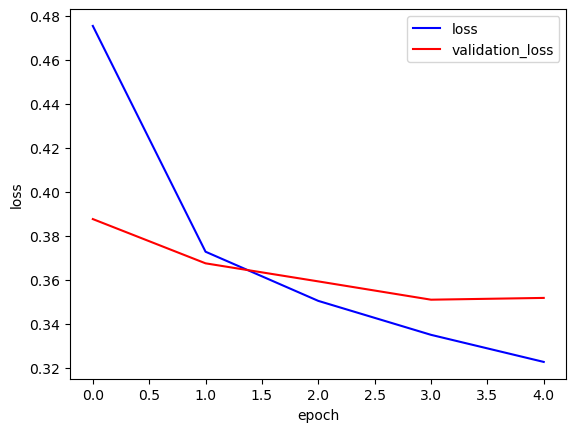

In [16]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="validation_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

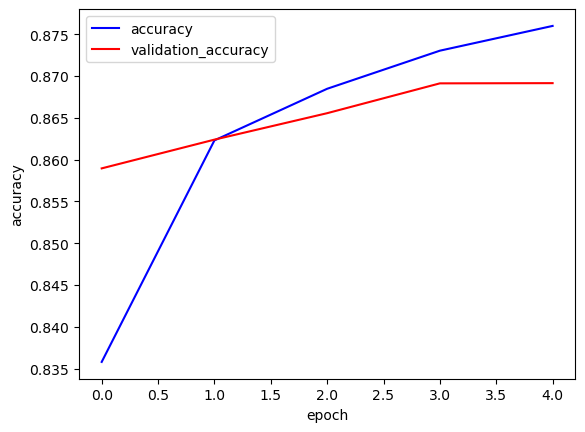

In [17]:
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="validation_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [27]:
model.save("modelHCR.h5")

/Users/abhishekpatwal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
loss, acc = model.evaluate(test_x, test_y)
print(loss, acc)

3636/3636 [==============================] - 16s 5ms/step - loss: 0.3518 - accuracy: 0.8691
0.3518136441707611 0.8691391348838806


In [19]:
predictions = model.predict(test_x)

3636/3636 [==============================] - 16s 5ms/step


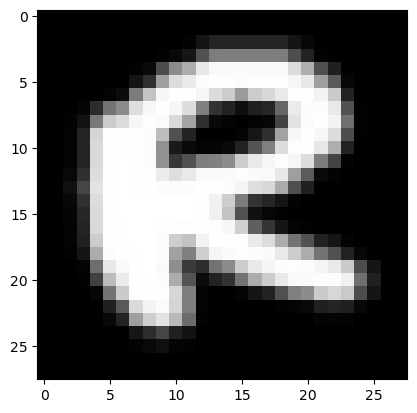

In [20]:
plt.imshow(test_x[14], cmap="gray")

In [21]:
# predicted class label
predicted_class_index = np.argmax(predictions[14])

class_label = word_dict[predicted_class_index]

print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

Predicted Class Index: 27
Predicted Class Label: R


In [22]:
confusion = confusion_matrix(np.argmax(test_y, axis=1),np.argmax(predictions, axis=1))
print(confusion)

[[4634    0    1 ...    0    0    0]
 [   0 5935    1 ...    0    0    0]
 [   2    2 5747 ...    0    0   40]
 ...
 [   0    0    2 ...  381    1    1]
 [   0    0    0 ...    1  154    0]
 [   0    0  100 ...    2    0  216]]


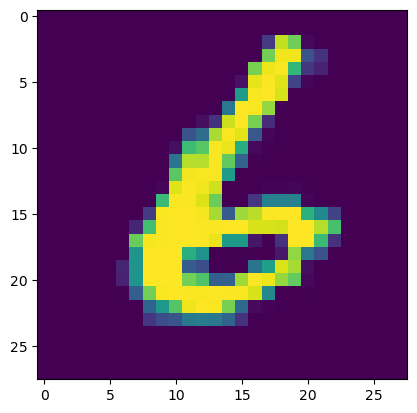

In [23]:
# Load the external image
image_path = '/Users/abhishekpatwal/MINI PROJECT SEM3/downloaded6.jpg'  

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

img = cv2.resize(img, (28, 28))

img= 255 - img

plt.imshow(img)  
plt.show()

# Reshape the image to match the model's input shape
img = img.reshape(1, 28, 28, 1)

In [24]:
# Make predictions

acc = model.predict(img)

# the predicted class label 
predicted_class_index = np.argmax(acc)

class_label = word_dict[predicted_class_index]

print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

1/1 [==============================] - 0s 35ms/step
Predicted Class Index: 6
Predicted Class Label: 6


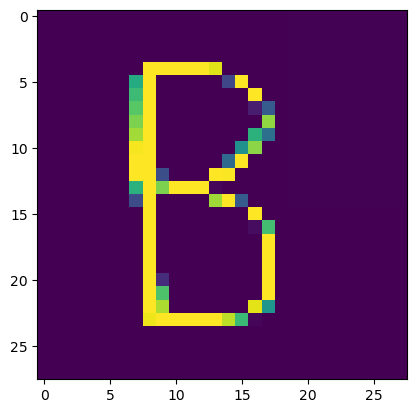

In [9]:
# Load the external image
image_path = '/Users/abhishekpatwal/MINI PROJECT SEM3/B.jpg' 

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

img = cv2.resize(img, (28, 28))

img= 255 - img

plt.imshow(img)  
plt.show()

# Reshape the image to match the model's input shape
img = img.reshape(1, 28, 28, 1)

In [10]:
# Make predictions
from tensorflow.keras.models import load_model

model = load_model("/Users/abhishekpatwal/MINI PROJECT SEM3/modelHCR.h5")

acc = model.predict(img)

# Get the predicted class label or index
predicted_class_index = np.argmax(acc)


class_label = word_dict[predicted_class_index]


print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

1/1 [==============================] - 0s 83ms/step
Predicted Class Index: 11
Predicted Class Label: B


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your model and word_dict here
model = load_model("/Users/abhishekpatwal/MINI PROJECT SEM3/modelHCR.h5")

word_dict = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
             10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I',
             19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R',
             28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a',
             37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
             46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s',
             55:'t', 56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

global img_tk

def browse_image():
    global img_tk  
    image_path = filedialog.askopenfilename() 
    
    # Load the original image for prediction
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (28, 28))
    original_img = 255 - original_img
    original_img = original_img.reshape(1, 28, 28, 1)

    # Load a copy of the image for display
    display_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    display_img = cv2.resize(display_img, (280, 280))  # Increased size by a factor of 10

    # Display the image
    img_tk = ImageTk.PhotoImage(Image.fromarray(display_img))
    image_label.config(image=img_tk)
    image_label.image = img_tk

    # Make predictions
    acc = model.predict(original_img)

    # the predicted class label 
    predicted_class_index = np.argmax(acc)
    class_label = word_dict[predicted_class_index]

    print("Predicted Class Index:", predicted_class_index)
    print("Predicted Class Label:", class_label)
    
    # Display the predicted class label
    result_label.config(text=f"Predicted Class: {class_label}")

# Create the main window
root = tk.Tk()
root.title("Handwritten Character Recognition")

# Button to browse and predict
browse_button = tk.Button(root, text="Browse Image", command=browse_image, font=("Helvetica", 60), fg="red", bg="blue")
browse_button.grid(row=0, column=0, pady=10)

# Label to display image
image_label = tk.Label(root, text="Image", font=("Helvetica", 26))
image_label.grid(row=1, column=0, pady=10)

# Label to display predicted result
result_label = tk.Label(root, text="Predicted Class: None", font=("Helvetica", 44))
result_label.grid(row=2, column=0, columnspan=2, pady=10)

# Run the main loop
root.mainloop()

1/1 [==============================] - 0s 30ms/step
Predicted Class Index: 10
Predicted Class Label: A


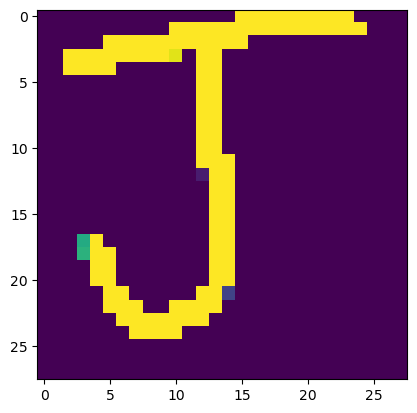

In [8]:
# Load the external image
image_path = 'Screenshot 2024-01-20 at 10.35.46 AM.jpg' 

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

img = cv2.resize(img, (28, 28))

img= 255 - img

plt.imshow(img)  
plt.show()

# Reshape the image to match the model's input shape
img = img.reshape(1, 28, 28, 1)

In [9]:
model = load_model("/Users/abhishekpatwal/MINI PROJECT SEM3/modelHCR.h5")

acc = model.predict(img)

# Get the predicted class label or index
predicted_class_index = np.argmax(acc)


class_label = word_dict[predicted_class_index]


print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

1/1 [==============================] - 0s 29ms/step
Predicted Class Index: 19
Predicted Class Label: J
